# Data Cleaning

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib as mpl

df = pd.read_csv('data/raw_survey_data_2022.csv',header=1)

from datetime import datetime

data1=df.iloc[:,1] #DataFrame with start time
data2=df.iloc[:,2] #DataFrame with end time
data3=df.iloc[:,3:] #DataFrame with data

data3["time"]=data2.apply(lambda x: datetime.strptime(x, '%m/%d/%y %H:%M'))-data1.apply(lambda x: datetime.strptime(x, '%m/%d/%y %H:%M'))
#(data1.iloc[:,1].values.astype('datetime64[D]')-data1.iloc[:,0].values.astype('datetime64[D]'))

                                                                                                    
index_time= data3["time"].apply(lambda x: x/np.timedelta64(1, 's'))

data3['clean']=(index_time>200)&(data3.iloc[:,176-3]=='2')&(data3.iloc[:,306-3]=='4')

df=data3.loc[data3.clean==True].iloc[:,:-2]
df.shape

n = 1271



In [20]:
df = df.rename(columns={df.columns.tolist()[67]:'department'})
df = df[df.department == 'Biomedical Engineering']
df.shape

n = 138

In [126]:
df2019 = pd.read_csv('/Users/lizhenni/Documents/MAZhenniLi/QoL/Copy of de-identified Graduate Student Quality of Life Survey - Spring 2019.xlsx - Graduate Student Quality of Lif.csv', header=0)
df2019 = df2019.rename(columns={df2019.columns.tolist()[70]:'department'})
df2019 = df2019[df2019.department == 'Biomedical Engineering']
df2019.shape

(87, 345)

In [28]:
df.head(10)

,Response,Academics,Mental health,Physical health,Professional development,Social life,Career Placement Team,Housing,Intercampus Shuttle/Via Service,Library services,...,Prefer to self-describe,Response.51,Response.52,Other (please specify).8,Response.53,Other (please specify).9,Response.54,Response.55,Response.56,Open-Ended Response.15
0,Agree,Strongly agree,Agree,Agree,Agree,Agree,Agree,Neither agree nor disagree,Neither agree nor disagree,Agree,...,NaN,No,Multiracial background,NaN,Jamaica (NA),NaN,less than 18,Yes,Yes,NaN
16,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Neither agree nor disagree,Neither agree nor disagree,Strongly agree,...,NaN,No,East Asian,NaN,China (AS),NaN,24-26,No,No,NaN
17,Neither agree or disagree,Disagree,Disagree,Disagree,Disagree,Agree,Disagree,Disagree,Disagree,Disagree,...,NaN,No,Middle Eastern and North African,NaN,United States (NA),NaN,21-23,Yes,Yes,"THERE NEEDS TO BE A MICROWAVE IN MUDD, ADDITIO..."
22,Neither agree or disagree,Agree,Neither agree nor disagree,Neither agree nor disagree,Agree,Disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,...,NaN,No,Non-Hispanic White,NaN,United States (NA),NaN,21-23,No,Yes,NaN
49,Disagree,Disagree,Agree,Disagree,Disagree,Disagree,Agree,Strongly disagree,Agree,Disagree,...,NaN,No,South Asian,NaN,NaN,NaN,24-26,Yes,Yes,NaN
64,Agree,Strongly agree,Disagree,Strongly disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Disagree,Neither agree nor disagree,Neither agree nor disagree,...,NaN,No,Middle Eastern and North African,NaN,Iran (AS),NaN,24-26,Yes,Yes,NaN
75,Agree,Agree,Disagree,Disagree,Disagree,Agree,Strongly disagree,Disagree,Agree,Agree,...,NaN,No,Middle Eastern and North African,NaN,Iran (AS),NaN,30-32,No,No,NaN
106,Agree,Agree,Neither agree nor disagree,Neither agree nor disagree,Agree,Agree,Neither agree nor disagree,Disagree,Agree,Agree,...,NaN,Yes,East Asian,NaN,I prefer not to answer.,NaN,27-29,No,No,NaN
111,Agree,Agree,Agree,Agree,Agree,Agree,Neither agree nor disagree,Disagree,Agree,Agree,...,NaN,No,Non-Hispanic White,NaN,France (EU),NaN,21-23,No,No,1) off campus housing is a great way to be sca...
139,Neither agree or disagree,Neither agree nor disagree,Strongly disagree,Disagree,Neither agree nor disagree,Agree,Neither agree nor disagree,Agree,Agree,Neither agree nor disagree,...,NaN,No,Middle Eastern and North African,NaN,Iran (AS),NaN,30-32,No,No,NaN


## funcs

In [137]:
def count_score(s):
    return ((len(s[s=='Very satisfied'])*5+\
    len(s[s=='Satisfied'])*4+\
    len(s[s=='Neither satisfied nor dissatisfied'])*3+\
    len(s[s=='Dissatisfied'])*2+\
    len(s[s=='Very dissatisfied']))/len(s))

In [30]:
# agree_index = ['Strongly agree', 'Agree', 'Neutral', 'Disagree', 'Strongly disagree']
agree_index = ['Strongly disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree']

def count_proportion(s):
    s_n = s.notna().sum()
    
    sa = s[s=='Strongly agree'].count() / s_n * 100
    a = s[s=='Agree'].count() / s_n * 100
    n = s[s=='Neither agree nor disagree'].count() / s_n * 100
    d = s[s=='Disagree'].count() / s_n * 100
    sd = s[s=='Strongly disagree'].count() / s_n * 100
    
    result = pd.Series(data=[sd, d, n, a, sa], 
                       index=agree_index)
    return(result)

In [31]:
agree_index_6 = ['Strongly disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree', 'Not Applicable']

def count_proportion_6(s):
    s_n = s.notna().sum()
    sa = s[s=='Strongly agree'].count() / s_n * 100
    a = s[s=='Agree'].count() / s_n * 100
    n = s[s=='Neither agree nor disagree'].count() / s_n * 100
    d = s[s=='Disagree'].count() / s_n * 100
    sd = s[s=='Strongly disagree'].count() / s_n * 100
    na = s[s=='Not Applicable'].count() / s_n * 100
    result = pd.Series(data=[sd, d, n, a, sa, na], 
                       index=agree_index_6)
    return(result)

In [32]:
def stack_func(t, xlabel, ylabel, title, index):
    print(t)
    print('\n')
    cmap = mpl.cm.Blues_r(np.linspace(0,0.9,100))
    cmap = mpl.colors.ListedColormap(cmap[10:,:-1])

    t_prop = t.apply(lambda x: x / x.sum(), axis=0)
    print(t_prop)
    print('\n')
#     t_a = t.sort_index().T
    t_a = t.T
    print(t_a)
    print('\n')
#     t_b = t_prop.sort_index().T
    t_b = t_prop.T
    print(t_b)

    # stack chart

    fig,ax = plt.subplots(figsize=(8,6), dpi=150)
    t.T.plot(kind='barh', 
                          stacked=True, 
                          colormap='Blues', 
                          figsize=(10,6), 
                          ax=ax)
    plt.legend(index[::1], bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0., ncol=1)

    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title, fontsize=20)

    for n, x in enumerate([*t.columns]):
        m=5
        for (proportion, count, y_loc) in zip(t_b.loc[x],
                                              t_a.loc[x],
                                              t_b.loc[x].cumsum()):

            if m<3:
                plt.text(x=(y_loc-0.5*proportion)*100-1,
                         y=n - 0.11,
                         s=f'{str(count).split(".")[0]}%', 
                         color="white",
                         fontsize=8,
                         fontweight="bold")
            if m>=3:
                plt.text(x=(y_loc-proportion*0.5)*100-1,
                         y=n - 0.11,
                         s=f'{str(count).split(".")[0]}%', 
                         color="black",
                         fontsize=8,
                         fontweight="bold")
            m-=1
            
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    plt.show()

# Overview - Demographics

## Gender

In [67]:
gender = df[["Female", "Male", "Non-binary", "Do not identify as female, male, or non-binary", 
             "I prefer not to answer", "Prefer to self-describe"]]

gender.dropna(how="all")
print(gender.count())

num_f = 86
num_m = 46

Female                                            86
Male                                              46
Non-binary                                         5
Do not identify as female, male, or non-binary     0
I prefer not to answer                             2
Prefer to self-describe                            0
dtype: int64


In [36]:
gender["Prefer to self-describe"].value_counts()

Series([], Name: Prefer to self-describe, dtype: int64)

<AxesSubplot:ylabel='None'>

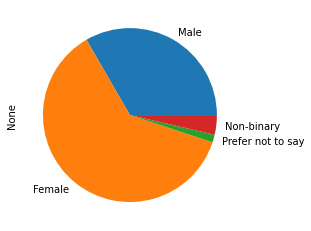

In [43]:
gender_plot = pd.Series([46, 85, 2, 5, 0], 
                        index=["Male", "Female", "Prefer not to say", "Non-binary", "Self-describe"])
gender_plot.plot(kind="pie")

In [44]:
# merge to one column
df.loc[df.Female.notna(), 'gender'] = 'Female'
df.loc[df.Male.notna(),'gender'] = 'Male'
df.loc[df['Non-binary'].notna(),'gender'] = 'Non-binary'
df.loc[df['I prefer not to answer'].notna(),'gender'] = 'Not to say'

df.drop(["Female", "Male", "Non-binary", "Do not identify as female, male, or non-binary", 
         "I prefer not to answer", "Prefer to self-describe"], axis=1)
df.gender.value_counts()

Female        85
Male          46
Non-binary     5
Not to say     2
Name: gender, dtype: int64

## Degree

In [45]:
degree = df.iloc[:, 68]
print(degree.value_counts() / n)
print(degree.value_counts())

# df.columns.values[68] = "degree"
# can't access a column with the new name after 'renaming'
df = df.rename(columns={df.columns.tolist()[68]:'degree'});

Master of Science (M.S.)        0.536232
Doctor of Philosophy (Ph.D.)    0.311594
M.S. leading to Ph.D.           0.152174
Name: degree, dtype: float64
Master of Science (M.S.)        74
Doctor of Philosophy (Ph.D.)    43
M.S. leading to Ph.D.           21
Name: degree, dtype: int64


<AxesSubplot:ylabel='degree'>

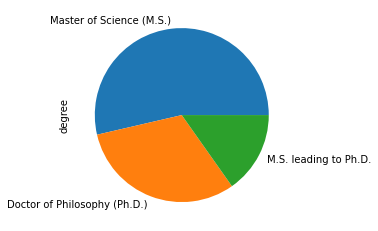

In [46]:
degree.value_counts().plot(kind='pie')

## Department

In [47]:
# df = df.rename(columns={df.columns.tolist()[67]:'department'})

df.department.value_counts()

Biomedical Engineering    138
Name: department, dtype: int64

## Semesters

In [48]:
df = df.rename(columns={df.columns.tolist()[66]:'semester'})

df.semester.value_counts()

1 semester                 50
2 semesters                29
3 semesters                11
7 semesters                 9
5 semesters                 8
4 semesters                 7
10 semesters or more        7
6 semesters                 6
8 semesters                 5
less than 1                 4
9 semesters                 1
I prefer not to answer.     1
Name: semester, dtype: int64

<AxesSubplot:ylabel='semester'>

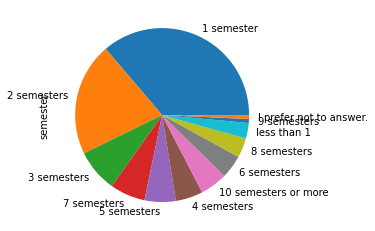

In [49]:
df.semester.value_counts().plot(kind='pie')

# Housing

In [50]:
housing = df.iloc[:, 274:296]
housing.columns

Index(['Response.35', 'Response.36', 'Response.37', 'Open-Ended Response.12',
       'Helpfulness of building superintendent',
       'Helpfulness of door attendant', 'Apartment renovations',
       'Building maintenance (regular cleaning, intercoms, elevators, etc.)',
       'Building Security', 'Cost.1', 'Quality of Internet Service',
       'Response.38', 'Unavailability of Columbia Residential units',
       'Housing cost', 'Housing location', 'Choice of accommodation(s)',
       'Choice of roommate(s)', 'Not Applicable', 'Other (please specify).5',
       'Response.39', 'Response.40', 'Open-Ended Response.13'],
      dtype='object')

### Helpfulness of Columbia with Housing Issues

In [52]:
helpfulness_h = df['Response.38']
helpfulness_h.value_counts()

Agree                         17
I never faced an issue         9
Neither agree nor disagree     8
Strongly agree                 7
Disagree                       4
Strongly disagree              4
Name: Response.38, dtype: int64

<AxesSubplot:ylabel='Response.38'>

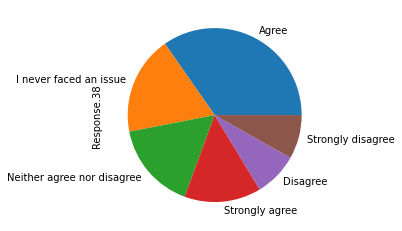

In [57]:
helpfulness_h.value_counts().plot(kind='pie')

In [59]:
# 2019
helpfulness_h2019 = df2019['Response.37']
helpfulness_h2019.value_counts() 

Strongly agree                10
Agree                         10
Neither agree nor disagree     7
Disagree                       5
I never faced an issue         4
Strongly disagree              1
Name: Response.37, dtype: int64

<AxesSubplot:ylabel='Response.37'>

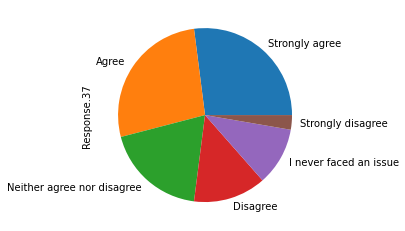

In [60]:
helpfulness_h2019.value_counts().plot(kind='pie')

### Location

In [54]:
df = df.rename(columns={df.columns.tolist()[274]:'location'})

print(df.location.value_counts() / n)
print(df.location.value_counts())

print("\nMasters:")
print(df.loc[df['degree']=='Master of Science (M.S.)', 'location'].value_counts() / 74)

print("\nPhD:")
print(df.loc[df['degree']=='Doctor of Philosophy (Ph.D.)', 'location'].value_counts() / 43)

# print("\nOff-campus:")
# print(df.loc[df['location']=='Off-campus', 'degree'].value_counts() / 21)

# print("\n:")
# print(df.loc[df['location']=='Columbia Residential (formerly known as University Apartment Housing (UAH))', 
#              'degree'].value_counts() / 364)

Off-campus                                                                     0.644928
Columbia Residential (formerly known as University Apartment Housing (UAH))    0.355072
Name: location, dtype: float64
Off-campus                                                                     89
Columbia Residential (formerly known as University Apartment Housing (UAH))    49
Name: location, dtype: int64

Masters:
Off-campus                                                                     0.810811
Columbia Residential (formerly known as University Apartment Housing (UAH))    0.189189
Name: location, dtype: float64

PhD:
Columbia Residential (formerly known as University Apartment Housing (UAH))    0.55814
Off-campus                                                                     0.44186
Name: location, dtype: float64


### Satisfaction

Disagree                      14
Agree                         14
Strongly disagree              7
Neither agree nor disagree     7
Strongly agree                 7
Name: application_satisfy, dtype: int64


<AxesSubplot:ylabel='application_satisfy'>

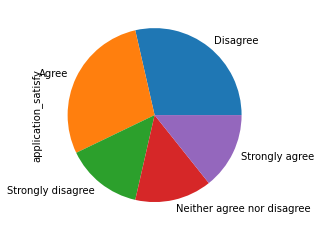

In [62]:
# Satisfaction with Columbia Residential

df = df.rename(columns={df.columns.tolist()[275]:'application_satisfy'})
df = df.rename(columns={df.columns.tolist()[276]:'transfer_satisfy'})

print(df['application_satisfy'].value_counts())
df['application_satisfy'].value_counts().plot(kind='pie')

Neither agree nor disagree    27
Strongly disagree             10
Disagree                       5
Agree                          5
Strongly agree                 2
Name: transfer_satisfy, dtype: int64


<AxesSubplot:ylabel='transfer_satisfy'>

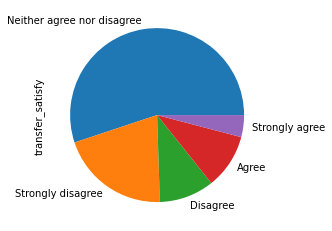

In [63]:
print(df['transfer_satisfy'].value_counts())
df['transfer_satisfy'].value_counts().plot(kind='pie')

In [17]:
# OCHA

# OCHA = df['Response.39']
# OCHA.value_counts().sum() - 621


610

### Safety

In [65]:
# safe

safe = df['Response.40']
safe.value_counts()

Agree                         61
Disagree                      31
Neither agree nor disagree    21
Strongly agree                15
Strongly disagree             10
Name: Response.40, dtype: int64

<AxesSubplot:ylabel='Response.40'>

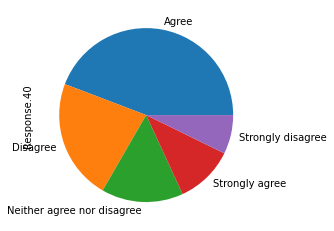

In [66]:
safe.value_counts().plot(kind='pie')

In [70]:
print('\033[1m' + 'How many students feel unsafe commuting' + '\033[0m')
safe_d = df[df['Response.40'] == 'Disagree'].gender
print(safe_d.value_counts())
print('\n')
print('\033[1m' + 'How many students feel strongly unsafe commuting' + '\033[0m')
safe_sd = df[df['Response.40'] == 'Strongly disagree'].gender
print(safe_sd.value_counts())

How many students feel unsafe commuting
Female        21
Male           8
Not to say     1
Non-binary     1
Name: gender, dtype: int64


How many students feel strongly unsafe commuting
Female    6
Male      4
Name: gender, dtype: int64


### Satisfaction with Residential Management

In [71]:
management = df[['Helpfulness of door attendant', 'Apartment renovations',
       'Building maintenance (regular cleaning, intercoms, elevators, etc.)',
       'Building Security', 'Cost.1', 'Quality of Internet Service']]

management

,Helpfulness of door attendant,Apartment renovations,"Building maintenance (regular cleaning, intercoms, elevators, etc.)",Building Security,Cost.1,Quality of Internet Service
0,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN
22,NaN,NaN,NaN,NaN,NaN,NaN
49,Strongly agree,Disagree,Disagree,Agree,Strongly disagree,Agree
...,...,...,...,...,...,...
1547,NaN,NaN,NaN,NaN,NaN,NaN
1551,Strongly disagree,Neither agree nor disagree,Agree,Strongly disagree,Neither agree nor disagree,Strongly disagree
1563,NaN,NaN,NaN,NaN,NaN,NaN
1580,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
management_t = pd.concat([count_proportion(df['Helpfulness of door attendant']), 
                           count_proportion(df['Apartment renovations']), 
                           count_proportion(df['Building maintenance (regular cleaning, intercoms, elevators, etc.)']), 
                           count_proportion(df['Building Security']), 
                           count_proportion(df['Cost.1']), 
                           count_proportion(df['Quality of Internet Service'])], axis=1)

c_management_t = ['Helpfulness of door attendant', 'Apartment renovations',
       'Building maintenance',
       'Building Security', 'Cost', 'Quality of Internet Service']

management_t.columns = c_management_t

management_t

,Helpfulness of door attendant,Apartment renovations,Building maintenance,Building Security,Cost,Quality of Internet Service
Strongly disagree,8.163265,12.244898,2.040816,6.122449,18.367347,14.285714
Disagree,2.040816,18.367347,12.244898,18.367347,22.448980,14.285714
Neutral,48.979592,34.693878,14.285714,16.326531,26.530612,4.081633
Agree,12.244898,22.448980,46.938776,34.693878,24.489796,44.897959
Strongly agree,28.571429,12.244898,24.489796,24.489796,8.163265,22.448980


                   Helpfulness of door attendant  Apartment renovations  \
Strongly disagree                       8.163265              12.244898   
Disagree                                2.040816              18.367347   
Neutral                                48.979592              34.693878   
Agree                                  12.244898              22.448980   
Strongly agree                         28.571429              12.244898   

                   Building maintenance  Building Security       Cost  \
Strongly disagree              2.040816           6.122449  18.367347   
Disagree                      12.244898          18.367347  22.448980   
Neutral                       14.285714          16.326531  26.530612   
Agree                         46.938776          34.693878  24.489796   
Strongly agree                24.489796          24.489796   8.163265   

                   Quality of Internet Service  
Strongly disagree                    14.285714  
Disagree    

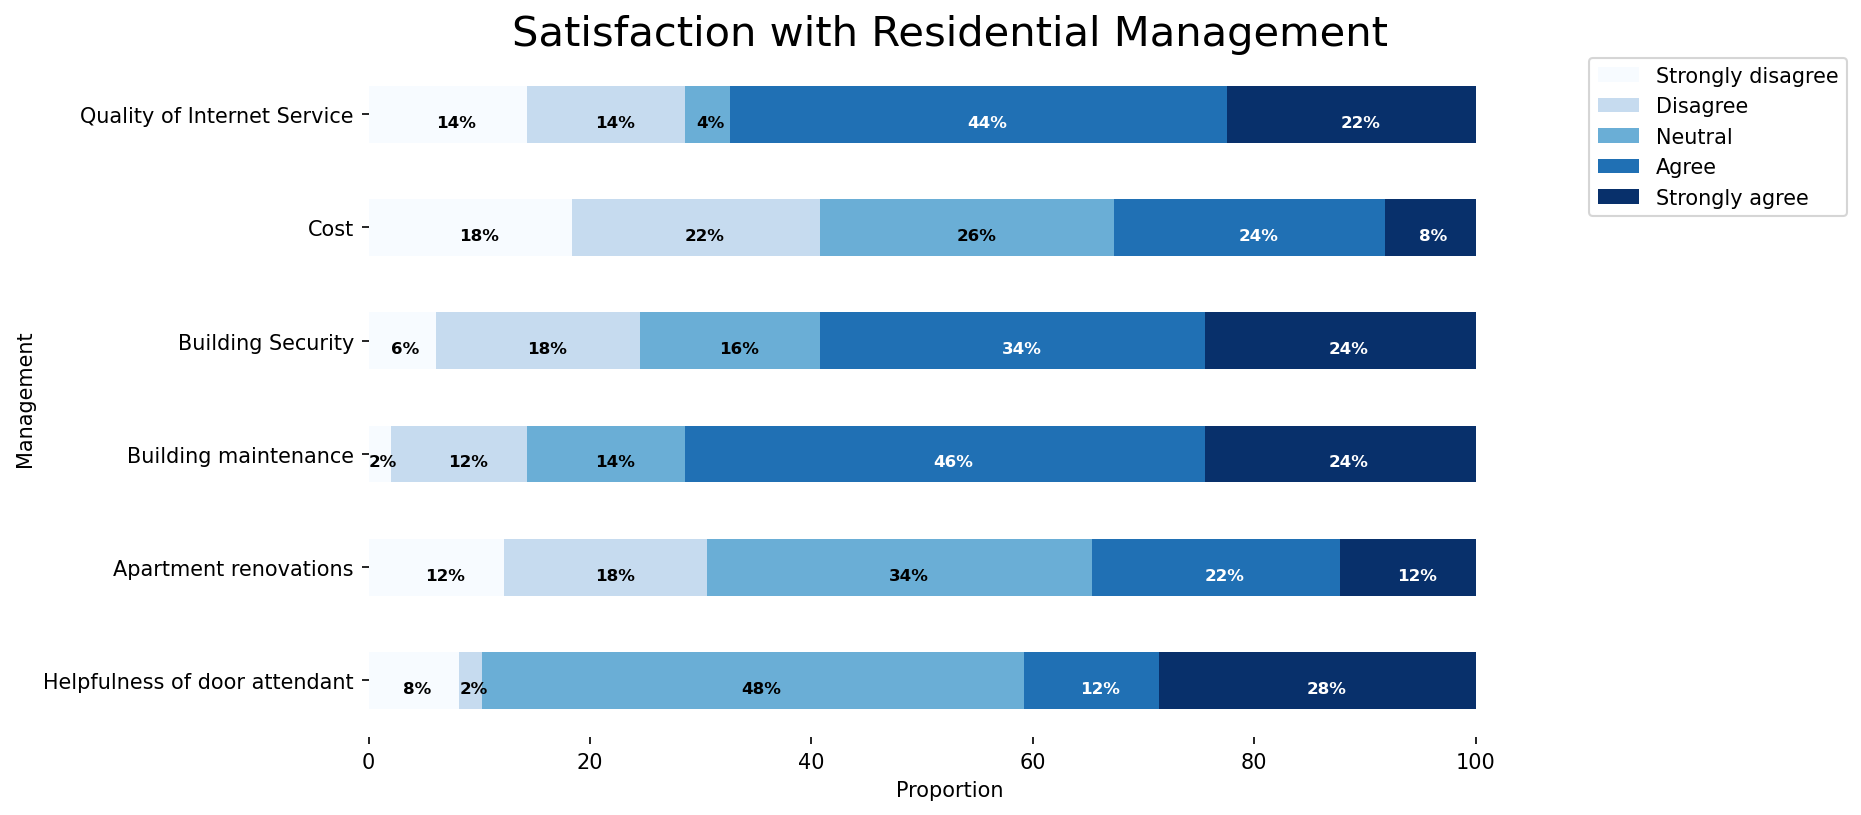

In [73]:
stack_func(management_t, "Proportion", "Management", "Satisfaction with Residential Management", agree_index)

## Academics: Integrity

In [74]:
integrity = df.iloc[:, 307:333]
integrity.columns

Index(['The academic integrity policies were clearly communicated:',
       'My classmates adhered to the university policies on academic integrity:',
       'The academic integrity policies were enforced by TAs or course instructors:',
       'Response.45', 'Response.46', 'I did not want to report a friend.',
       'I did not want to report a classmate.',
       'I was uncertain of the confidentiality of the process.',
       'I was uncomfortable approaching authority figures (i.e. faculty and/or administration).',
       'I thought the violation was not severe.',
       'I did not know how to report the violation.',
       'Other (please specify).7', 'Response.47', 'Warning by TA',
       'Warning by Professor', 'Academic penalty imposed by Professor',
       'Violation referral made to the Office of Graduate Student Affairs',
       'No action was taken', 'Response.48', 'Response.49', 'Not Applicable.1',
       'I am finding the course load too heavy to manage',
       'I do not un

### score stack

In [99]:
communicated = df['The academic integrity policies were clearly communicated:']
communicated.value_counts()
# (693*4+434*5+3*111+23*2+10*1)/(693+434+111+23+10)

enforced = df['The academic integrity policies were enforced by TAs or course instructors:']
enforced.value_counts()
# (654*4+372*5+158*3+64*2+23*1)/(654+372+158+64+23)

classmates = df['My classmates adhered to the university policies on academic integrity:']
classmates.value_counts()
# (599*4+304*5+225*3+95*2+48*1)/(599+304+225+95+48)

count_score(classmates.value_counts())

3.818840579710145

### Report

In [101]:
aware = df['Response.45']
aware.value_counts()

No          108
Not Sure     16
Yes          14
Name: Response.45, dtype: int64

<AxesSubplot:ylabel='Response.45'>

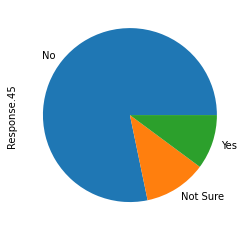

In [104]:
aware.value_counts().plot(kind='pie')

In [106]:
report = df['Response.46']
report.value_counts() #sum up to 146

No                                                10
Yes, I reported it to the Instructor/Professor     4
Yes, I reported it to both TA and Instructor       1
Name: Response.46, dtype: int64

<AxesSubplot:ylabel='Response.46'>

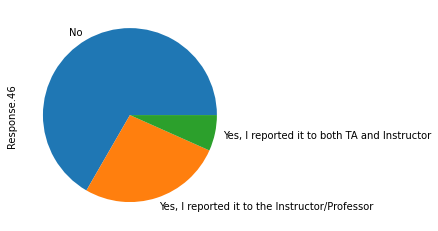

In [107]:
report.value_counts().plot(kind='pie')

In [108]:
# reasons for not reporting

friend = df['I did not want to report a friend.'].notna().sum()
print(friend)

mate = df['I did not want to report a classmate.'].notna().sum()
print(mate)

confidentiality = df['I was uncertain of the confidentiality of the process.'].notna().sum()
print(confidentiality)

authority = df['I was uncomfortable approaching authority figures (i.e. faculty and/or administration).'].notna().sum()
print(authority)

not_severe = df['I thought the violation was not severe.'].notna().sum()
print(not_severe)

dkhow = df['I did not know how to report the violation.'].notna().sum()
print(dkhow)

others = df['Other (please specify).7'].dropna()
print(others.count())
others

4
3
2
1
6
2
5


111     We all exchange pieces of codes for homework a...
183                              Someone else reported it
1052    I have seen how the university dealt with simi...
1113    I was not in the class - I heard it from a fri...
1232    It was already reported and handled by the tim...
Name: Other (please specify).7, dtype: object

### TA 

In [109]:
TA = df['Response.47']
TA.value_counts()

I did not serve as a TA    83
No                         43
Yes                        12
Name: Response.47, dtype: int64

In [110]:
warning_TA = df['Warning by TA'].notna().sum()
print(warning_TA)

warning_prof = df['Warning by Professor'].notna().sum()
print(warning_prof)

penalty = df['Academic penalty imposed by Professor'].notna().sum()
print(penalty)

office = df['Violation referral made to the Office of Graduate Student Affairs'].notna().sum()
print(office)

no_action = df['No action was taken'].notna().sum()
print(warning_TA)

5
5
3
1
5


### Have you ever violated an Academic Integrity policy?

In [111]:
violate = df['Response.48']

violate.value_counts()

No          123
Not Sure      9
Yes           6
Name: Response.48, dtype: int64

In [112]:
# reasons

workload = df['I am finding the course load too heavy to manage'].notna().sum()
print(workload)

not_understand_policies = df['I do not understand the Academic Integrity policies and procedures'].notna().sum()
print(not_understand_policies)

classmates_violate_too = df['My classmates are not disciplined for violating Academic Integrity policies'].notna().sum()
print(classmates_violate_too)


39
21
15


### peer reporting & virtual/hybrid learning

In [113]:
peer = df['Response.49']
virtual = df['Response.50']

print(peer.value_counts())
print(virtual.value_counts())

No          52
Not Sure    48
Yes         38
Name: Response.49, dtype: int64
Neither agree nor disagree    50
Agree                         47
Strongly agree                19
Disagree                      17
Strongly disagree              5
Name: Response.50, dtype: int64


## Networking

In [114]:
networking = df.iloc[:, 138:153]
networking

,I have not been actively developing alumni contacts,"Alumni Associations (CEAA, CEYA, CAA)",Events organized by the Alumni Affairs Office,Events organized by EGSC or Office of Graduate Student Affairs,Faculty.1,Graduate Engineer's Connect,Department administration.1,Friends,"Events organized by student groups (CCV, CEEC, CFEC, DGE, DSISC, ELC, GEEC, GoBME, GradSWE, HinduYUVA, MEGA, PMC, qSTEM, SPICMACAY)",Professional Development and Leadership (PDL) Program.1,Other (please specify).3,Response.18,Response.19,Other (please specify).4,Open-Ended Response.4
0,I have not been actively developing alumni con...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agree,NaN,NaN,NaN
16,NaN,NaN,NaN,Events organized by EGSC or Office of Graduate...,NaN,NaN,NaN,Friends,"Events organized by student groups (CCV, CEEC,...",NaN,NaN,Agree,NaN,NaN,NaN
17,NaN,NaN,NaN,Events organized by EGSC or Office of Graduate...,Faculty,NaN,NaN,Friends,"Events organized by student groups (CCV, CEEC,...",NaN,NaN,Neither agree nor disagree,NaN,NaN,there need to be more intimate settings. its h...
22,I have not been actively developing alumni con...,NaN,NaN,NaN,NaN,NaN,NaN,Friends,NaN,NaN,NaN,Strongly agree,NaN,NaN,NaN
49,I have not been actively developing alumni con...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agree,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547,I have not been actively developing alumni con...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neither agree nor disagree,NaN,NaN,NaN
1551,I have not been actively developing alumni con...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agree,NaN,NaN,NaN
1563,NaN,NaN,NaN,NaN,Faculty,NaN,NaN,Friends,NaN,NaN,NaN,Neither agree nor disagree,NaN,NaN,NaN
1580,I have not been actively developing alumni con...,NaN,NaN,NaN,Faculty,NaN,Department administration,Friends,NaN,NaN,NaN,Strongly agree,NaN,NaN,NaN


### Resources 

In [116]:
not_developing = df['I have not been actively developing alumni contacts']
1 - not_developing.notna().sum() / n

0.644927536231884

In [117]:
network_resources = df.iloc[:, 139:149]
network_resources.notna().sum()

Alumni Associations (CEAA, CEYA, CAA)                                                                                                  10
Events organized by the Alumni Affairs Office                                                                                          11
Events organized by EGSC or Office of Graduate Student Affairs                                                                         24
Faculty.1                                                                                                                              50
Graduate Engineer's Connect                                                                                                             8
Department administration.1                                                                                                            16
Friends                                                                                                                                83
Events organized by student groups

### Get involved as an alumni

In [118]:
df['Response.18'].value_counts()

Agree                         59
Neither agree nor disagree    47
Strongly agree                15
Disagree                      13
Strongly disagree              4
Name: Response.18, dtype: int64

In [119]:
# reasons
df['Response.19'].value_counts()

I'm not aware of opportunities to stay involved                8
I don't find the current networking events appealing           6
I'll be relocating to another part of the country or abroad    2
Other (please specify)                                         1
Name: Response.19, dtype: int64

## Health and Safety

In [120]:
health = df.iloc[:, 248:274]
health

,Response.26,Response.27,Response.28,Response.29,Response.30,Response.31,Response.32,Response.33,Open-Ended Response.11,Office of University Life (OUL) Tutorial,...,Gender-Based Misconduct Appeal Process,SVR (Sexual Violence Response),EOAA (Equal Opportunity and Affirmative Action),CPS (Counseling Psychology Services),Response.34,The food that I bought just did not last and I didn't have money to buy more.,I cannot afford to eat balanced meals.,I have eaten less than what I should have because there wasn’t enough money to buy food.,"In the past, I have had to cut the size of meals or skip meals because there wasn’t enough money for food.",I have not eaten for a whole day because there wasn’t enough money to buy food.
0,Agree,No,I did not know about them,NaN,NaN,NaN,Not Applicable,No,NaN,Neither agree nor disagree,...,No,No,No,No,Disagree,Neither disagree nor agree,Disagree,Disagree,Agree,Disagree
16,Strongly agree,No,I do not need them,NaN,NaN,NaN,Agree,Yes,NaN,Strongly Agree,...,Yes,Yes,Yes,Yes,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree
17,Agree,No,I did not know about them,NaN,NaN,NaN,Disagree,Yes,i may or may not have a cavity,Strongly disagree,...,Yes,Yes,Yes,Yes,Strongly disagree,Disagree,Disagree,Disagree,Disagree,Disagree
22,Agree,No,I am too busy,NaN,NaN,NaN,Neither agree nor disagree,Not applicable,NaN,Neither agree nor disagree,...,No,No,No,Yes,Disagree,Disagree,Neither disagree nor agree,Neither disagree nor agree,Neither disagree nor agree,Strongly disagree
49,Disagree,No,I do not need them,NaN,NaN,NaN,Disagree,Not applicable,NaN,Disagree,...,Yes,Yes,Yes,Yes,Strongly disagree,Disagree,Disagree,Disagree,Disagree,Disagree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547,Neither agree nor disagree,No,I am too busy,NaN,NaN,NaN,Not Applicable,Not applicable,NaN,Agree,...,Yes,Yes,Yes,Yes,Disagree,Disagree,Disagree,Disagree,Disagree,Disagree
1551,Agree,No,I do not need them,NaN,NaN,NaN,Not Applicable,Not applicable,NaN,Strongly Agree,...,No,Yes,No,Yes,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree
1563,Agree,Yes,NaN,No,Strongly agree,NaN,Agree,Yes,NaN,Neither agree nor disagree,...,No,Yes,No,Yes,Disagree,Disagree,Disagree,Disagree,Disagree,Disagree
1580,Agree,No,I was not aware of the confidentiality in the ...,NaN,NaN,NaN,Disagree,No,NaN,Neither agree nor disagree,...,No,No,No,Yes,Strongly disagree,Disagree,Disagree,Disagree,Disagree,Disagree


### Usefulness of Health Services

In [124]:
usefulness = df.iloc[:, 245:248]
print(usefulness['Medical services at Columbia'].value_counts())
print('score:' + str(count_score(usefulness['Medical services at Columbia'].value_counts())))
print('\n')
print(usefulness['Go Ask Alice!'].value_counts())
print('score:' + str(count_score(usefulness['Go Ask Alice!'].value_counts())))
print('\n')
print(usefulness['Alice! organized workshops (Nutrition, Fitness, Sexual & Reproductive Health, Stress, Tobacco cessation etc)'].value_counts())
print('score:' + str(count_score(usefulness['Alice! organized workshops (Nutrition, Fitness, Sexual & Reproductive Health, Stress, Tobacco cessation etc)'].value_counts())))

Agree                         53
Strongly agree                26
Neither agree nor disagree    17
Disagree                      10
Strongly disagree              3
Name: Medical services at Columbia, dtype: int64
score:3.770642201834862


Neither agree nor disagree    35
Agree                         12
Strongly agree                 5
Disagree                       4
Strongly disagree              2
Name: Go Ask Alice!, dtype: int64
score:3.3275862068965516


Neither agree nor disagree    30
Agree                         16
Disagree                       6
Strongly agree                 6
Strongly disagree              3
Name: Alice! organized workshops (Nutrition, Fitness, Sexual & Reproductive Health, Stress, Tobacco cessation etc), dtype: int64
score:3.4262295081967213


In [128]:
# usefulness2019 = df2019[['Medical services at Columbia', 'Go Ask Alice!', 'Alice! organized workshops (Nutrition, Fitness, Sexual & Reproductive Health, Stress, Tobacco cessation etc)']]
# usefulness2019.mean()

In [129]:
safety = df['Response.26']
safety.value_counts()

Agree                         85
Strongly agree                32
Neither agree nor disagree    12
Disagree                       5
Strongly disagree              4
Name: Response.26, dtype: int64

In [130]:
# safety - demographics

safety_d = df[df['Response.26'] == 'Disagree'].gender
print(safety_d.value_counts())

safety_sd = df[df['Response.26'] == 'Strongly disagree'].gender
safety_sd.value_counts()

Female    4
Male      1
Name: gender, dtype: int64


Female    4
Name: gender, dtype: int64

In [131]:
counseling = df['Response.27']
counseling.value_counts()

No     98
Yes    40
Name: Response.27, dtype: int64

In [132]:
counseling_reason = df['Response.28']
counseling_reason.value_counts()

I do not need them                                       45
I am too busy                                            28
I did not think the services would help me               14
I did not know about them                                 7
I was not aware of the confidentiality in the process     4
I am too embarrassed                                      1
Name: Response.28, dtype: int64

In [133]:
# dental

dental = df['Response.33']
dental.value_counts()

Not applicable    50
Yes               48
No                40
Name: Response.33, dtype: int64

## Student life

In [134]:
student_life = df.iloc[:, 153:196]
student_life.columns

Index(['Themed social events (Harry Potter Trivia Night, Gaming Night, etc.)',
       'Off-Campus socials (Boat Cruise, Rooftop socials, Amity Hall, etc...)',
       'Interschool events (Festifall, Mel's Burger Bar Mixer, Poker Night, etc.)',
       'Entertainment (Sports games, AMC movie nights, etc.)',
       'Organized sporting activities (Bowling, ice skating, ski trips etc.)',
       'Performance Arts (Broadway Shows, ballet, opera, NY Philharmonic, etc.)',
       'Events organized by student groups (CCV, CEEC, CFEC, DGE, DSISC, ELC, GEEC, GoBME, GradSWE, HinduYUVA, MEGA, PMC, qSTEM, SPICMACAY).1',
       'On-campus gatherings (Carleton Commons socials, watching sports games, etc.)',
       'Overall sense of community within SEAS',
       'Overall sense of community within my department',
       'Number of social events and programs within SEAS',
       'Diversity of social events and programs within SEAS',
       'Diversity of student groups within SEAS',
       'Capacity/number 

### Satisfaction with Community Building Efforts

In [135]:
satisfy_community2019 = df2019.iloc[:, 155:160]
satisfy_community2019

satisfy_community = df[['Number of social events and programs within SEAS',
       'Diversity of social events and programs within SEAS',
       'Diversity of student groups within SEAS',
       'Capacity/number of tickets available for EGSC/GSA events',
       'Pricing of tickets for EGSC/GSA events']]
satisfy_community

,Number of social events and programs within SEAS,Diversity of social events and programs within SEAS,Diversity of student groups within SEAS,Capacity/number of tickets available for EGSC/GSA events,Pricing of tickets for EGSC/GSA events
0,Satisfied,Satisfied,Neither satisfied nor dissatisfied,Dissatisfied,Satisfied
16,Satisfied,Satisfied,Satisfied,Satisfied,Neither satisfied nor dissatisfied
17,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied
22,Neither satisfied nor dissatisfied,Neither satisfied nor dissatisfied,Neither satisfied nor dissatisfied,Neither satisfied nor dissatisfied,Neither satisfied nor dissatisfied
49,Satisfied,Dissatisfied,Dissatisfied,Very dissatisfied,Satisfied
...,...,...,...,...,...
1547,Neither satisfied nor dissatisfied,Neither satisfied nor dissatisfied,Neither satisfied nor dissatisfied,Dissatisfied,Neither satisfied nor dissatisfied
1551,Neither satisfied nor dissatisfied,Satisfied,Satisfied,Very dissatisfied,Very dissatisfied
1563,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied
1580,Dissatisfied,Dissatisfied,Dissatisfied,Dissatisfied,Satisfied


In [138]:
print(count_score(df['Number of social events and programs within SEAS']))
# print(count_score(df2019['Number of social events and programs within SEAS']))
print('\n')
print(count_score(df['Diversity of social events and programs within SEAS']))
# print(count_score(df2019['Diversity of social events and programs within SEAS']))
print('\n')
print(count_score(df['Diversity of student groups within SEAS']))
# print(count_score(df2019['Diversity of student groups within SEAS']))
print('\n')
print(count_score(df['Capacity/number of tickets available for EGSC/GSA events']))
# print(count_score(df2019['Capacity/number of tickets available for EGSC/GSA events']))
print('\n')
print(count_score(df['Pricing of tickets for EGSC/GSA events']))
# print(count_score(df2019['Pricing of tickets for EGSC/GSA events']))
print('\n')

3.5


3.572463768115942


3.572463768115942


2.6956521739130435


3.5072463768115942




### Preferred way of hearing about student events

In [139]:
way = df[['Google Calendar', 'Flyers', 'GSA Newsletter',
       'EGSC Newsletter', 'Emails from Graduate Student Affairs office',
       'Facebook', 'Twitter Feed', 'EGSC website/Facebook page', 'WeChat',
       'WhatsApp', 'Instagram', 'Mudd 4th floor projector']]
way.notna().sum()

Google Calendar                                 39
Flyers                                          11
GSA Newsletter                                  37
EGSC Newsletter                                 53
Emails from Graduate Student Affairs office    102
Facebook                                        15
Twitter Feed                                     8
EGSC website/Facebook page                      11
WeChat                                          10
WhatsApp                                        27
Instagram                                       62
Mudd 4th floor projector                        17
dtype: int64

### Satisfaction with EGSC and GSA Events

In [140]:
satifaction1 = df[['Themed social events (Harry Potter Trivia Night, Gaming Night, etc.)',
                   'Off-Campus socials (Boat Cruise, Rooftop socials, Amity Hall, etc...)',
                   'Interschool events (Festifall, Mel\'s Burger Bar Mixer, Poker Night, etc.)',
                   'Entertainment (Sports games, AMC movie nights, etc.)',
                   'Organized sporting activities (Bowling, ice skating, ski trips etc.)',
                   'Performance Arts (Broadway Shows, ballet, opera, NY Philharmonic, etc.)',
                   'Events organized by student groups (CCV, CEEC, CFEC, DGE, DSISC, ELC, GEEC, GoBME, GradSWE, HinduYUVA, MEGA, PMC, qSTEM, SPICMACAY).1',
                   'On-campus gatherings (Carleton Commons socials, watching sports games, etc.)']]
satifaction1['On-campus gatherings (Carleton Commons socials, watching sports games, etc.)'].value_counts()

Agree                         56
Strongly agree                37
Neither agree nor disagree    31
Disagree                      12
Strongly disagree              2
Name: On-campus gatherings (Carleton Commons socials, watching sports games, etc.), dtype: int64

In [146]:
stack_satisfy_events = pd.concat([count_proportion(df['Themed social events (Harry Potter Trivia Night, Gaming Night, etc.)']), 
                                  count_proportion(df['Off-Campus socials (Boat Cruise, Rooftop socials, Amity Hall, etc...)']), 
                                  count_proportion(df['Interschool events (Festifall, Mel\'s Burger Bar Mixer, Poker Night, etc.)']),
                                  count_proportion(df['Entertainment (Sports games, AMC movie nights, etc.)']), 
                                  count_proportion(df['Organized sporting activities (Bowling, ice skating, ski trips etc.)']), 
                                  count_proportion(df['Performance Arts (Broadway Shows, ballet, opera, NY Philharmonic, etc.)']), 
                                  count_proportion(df['Events organized by student groups (CCV, CEEC, CFEC, DGE, DSISC, ELC, GEEC, GoBME, GradSWE, HinduYUVA, MEGA, PMC, qSTEM, SPICMACAY).1']), 
                                  count_proportion(df['On-campus gatherings (Carleton Commons socials, watching sports games, etc.)'])], axis=1)

c_stack_satisfy_events = ['Themed social events', 
                          'Off-Campus socials', 
                          'Interschool events', 
                          'Entertainment', 
                          'Organized sporting activities', 
                          'Performance Arts', 
                          'Events organized by student groups', 
                          'On-campus gatherings']

stack_satisfy_events.columns = c_stack_satisfy_events

stack_satisfy_events

,Themed social events,Off-Campus socials,Interschool events,Entertainment,Organized sporting activities,Performance Arts,Events organized by student groups,On-campus gatherings
Strongly disagree,3.623188,1.449275,2.898551,3.623188,2.898551,1.449275,2.173913,1.449275
Disagree,12.318841,5.072464,6.521739,5.072464,7.971014,2.898551,5.072464,8.695652
Neutral,31.159420,18.115942,24.637681,23.188406,26.811594,19.565217,31.884058,22.463768
Agree,34.782609,37.681159,42.753623,40.579710,39.855072,36.231884,39.855072,40.579710
Strongly agree,18.115942,37.681159,23.188406,27.536232,22.463768,39.855072,21.014493,26.811594


In [147]:
stack_satisfy_events_prop = stack_satisfy_events.apply(lambda x: x / x.sum(), axis=0)

stack_satisfy_events_a = stack_satisfy_events.sort_index().T
stack_satisfy_events_b = stack_satisfy_events_prop.sort_index().T
stack_satisfy_events_b

,Agree,Disagree,Neutral,Strongly agree,Strongly disagree
Themed social events,0.347826,0.123188,0.311594,0.181159,0.036232
Off-Campus socials,0.376812,0.050725,0.181159,0.376812,0.014493
Interschool events,0.427536,0.065217,0.246377,0.231884,0.028986
Entertainment,0.405797,0.050725,0.231884,0.275362,0.036232
Organized sporting activities,0.398551,0.079710,0.268116,0.224638,0.028986
Performance Arts,0.362319,0.028986,0.195652,0.398551,0.014493
Events organized by student groups,0.398551,0.050725,0.318841,0.210145,0.021739
On-campus gatherings,0.405797,0.086957,0.224638,0.268116,0.014493


                   Themed social events  Off-Campus socials  \
Strongly disagree              3.623188            1.449275   
Disagree                      12.318841            5.072464   
Neutral                       31.159420           18.115942   
Agree                         34.782609           37.681159   
Strongly agree                18.115942           37.681159   

                   Interschool events  Entertainment  \
Strongly disagree            2.898551       3.623188   
Disagree                     6.521739       5.072464   
Neutral                     24.637681      23.188406   
Agree                       42.753623      40.579710   
Strongly agree              23.188406      27.536232   

                   Organized sporting activities  Performance Arts  \
Strongly disagree                       2.898551          1.449275   
Disagree                                7.971014          2.898551   
Neutral                                26.811594         19.565217   
Agre

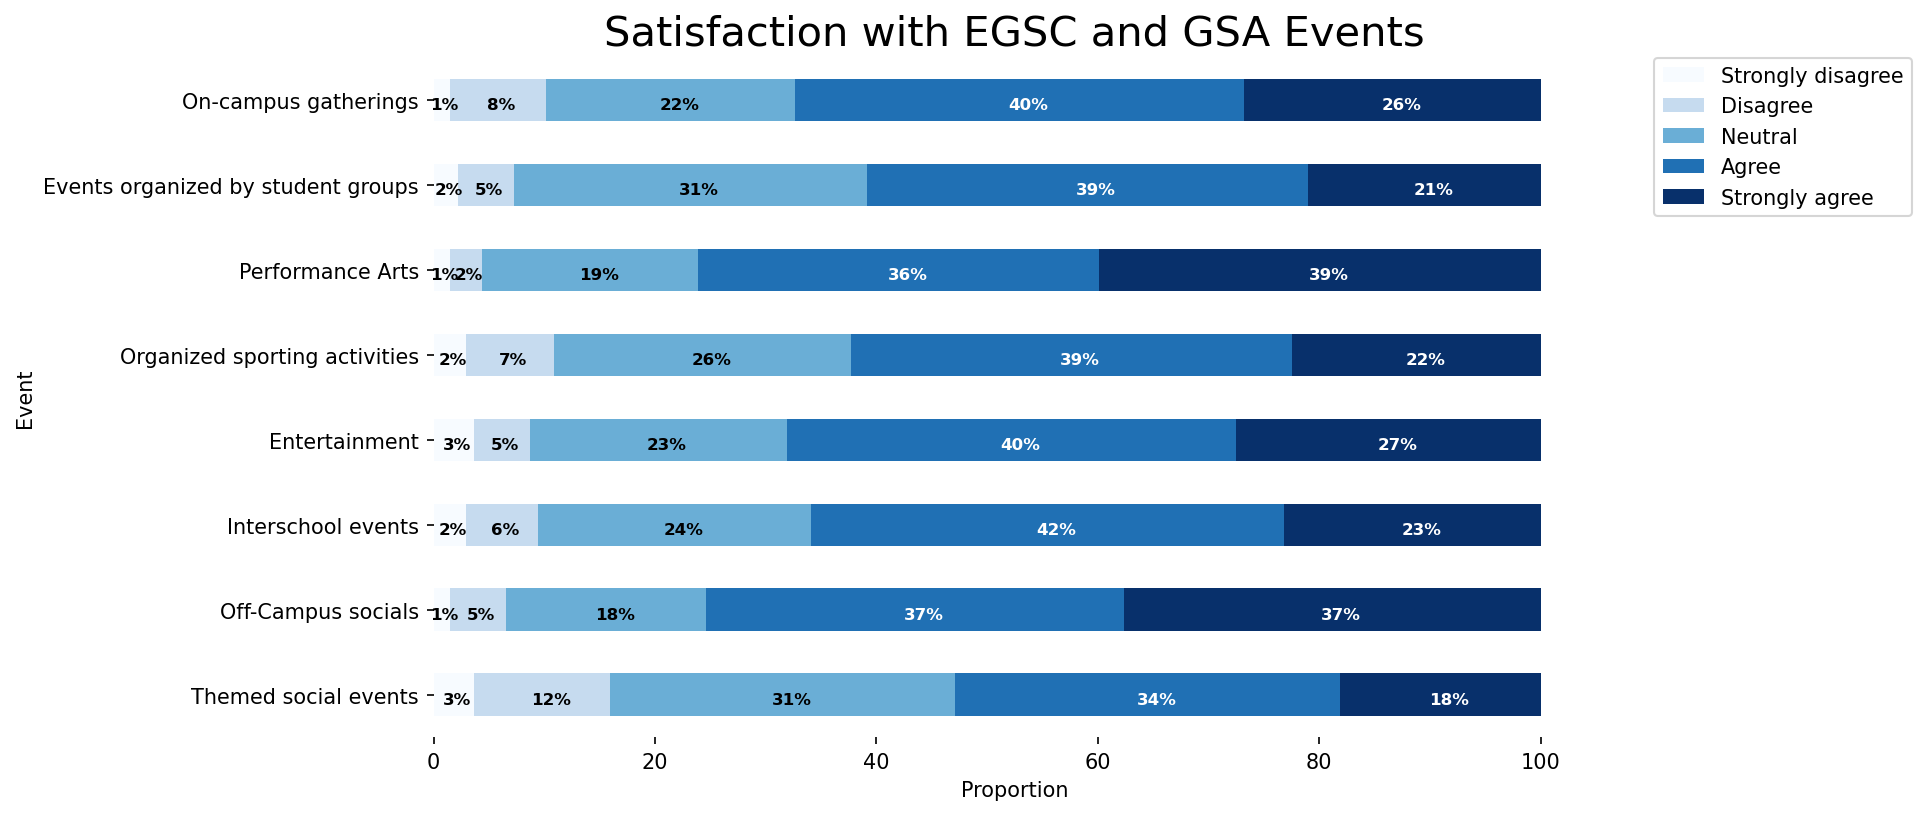

In [145]:
stack_func(stack_satisfy_events, "Proportion", "Event", "Satisfaction with EGSC and GSA Events", agree_index)

### Satisfaction with Peer-networking Events

In [148]:
peer_network = df[['GSA events (including orientation)', 
                   'Department-sponsored events',
                   'EGSC events',
                   'Other student group-sponsored events (CCV, CEEC, CFEC, DGE, DSISC, ELC, GEEC, GoBME, GradSWE, HinduYUVA, MEGA, PMC, qSTEM, SPICMACAY)',
                   'Professional Development and Leadership (PDL) Program.2']]

peer_network['GSA events (including orientation)'].value_counts()

Agree                         46
Neither agree nor disagree    34
Strongly agree                24
Not Applicable                16
Disagree                      10
Strongly disagree              8
Name: GSA events (including orientation), dtype: int64

In [149]:
stack_peernetwork_events = pd.concat([count_proportion_6(df['GSA events (including orientation)']),
                                      count_proportion_6(df['Department-sponsored events']), 
                                      count_proportion_6(df['EGSC events']),
                                      count_proportion_6(df['Other student group-sponsored events (CCV, CEEC, CFEC, DGE, DSISC, ELC, GEEC, GoBME, GradSWE, HinduYUVA, MEGA, PMC, qSTEM, SPICMACAY)']),
                                      count_proportion_6(df['Professional Development and Leadership (PDL) Program.2'])], axis=1)

c_stack_peernetwork_events = ['GSA events', 
                              'Department-sponsored events',
                              'EGSC events',
                              'Other student group-sponsored events',
                              'PDL']

stack_peernetwork_events.columns = c_stack_peernetwork_events

stack_peernetwork_events

,GSA events,Department-sponsored events,EGSC events,Other student group-sponsored events,PDL
Strongly disagree,5.797101,2.898551,4.347826,3.623188,9.420290
Disagree,7.246377,3.623188,6.521739,3.623188,18.115942
Neutral,24.637681,16.666667,24.637681,31.159420,29.710145
Agree,33.333333,38.405797,35.507246,28.260870,15.942029
Strongly agree,17.391304,28.260870,19.565217,18.840580,11.594203
Not Applicable,11.594203,10.144928,9.420290,14.492754,15.217391


                   GSA events  Department-sponsored events  EGSC events  \
Strongly disagree    5.797101                     2.898551     4.347826   
Disagree             7.246377                     3.623188     6.521739   
Neutral             24.637681                    16.666667    24.637681   
Agree               33.333333                    38.405797    35.507246   
Strongly agree      17.391304                    28.260870    19.565217   
Not Applicable      11.594203                    10.144928     9.420290   

                   Other student group-sponsored events        PDL  
Strongly disagree                              3.623188   9.420290  
Disagree                                       3.623188  18.115942  
Neutral                                       31.159420  29.710145  
Agree                                         28.260870  15.942029  
Strongly agree                                18.840580  11.594203  
Not Applicable                                14.492754  15.

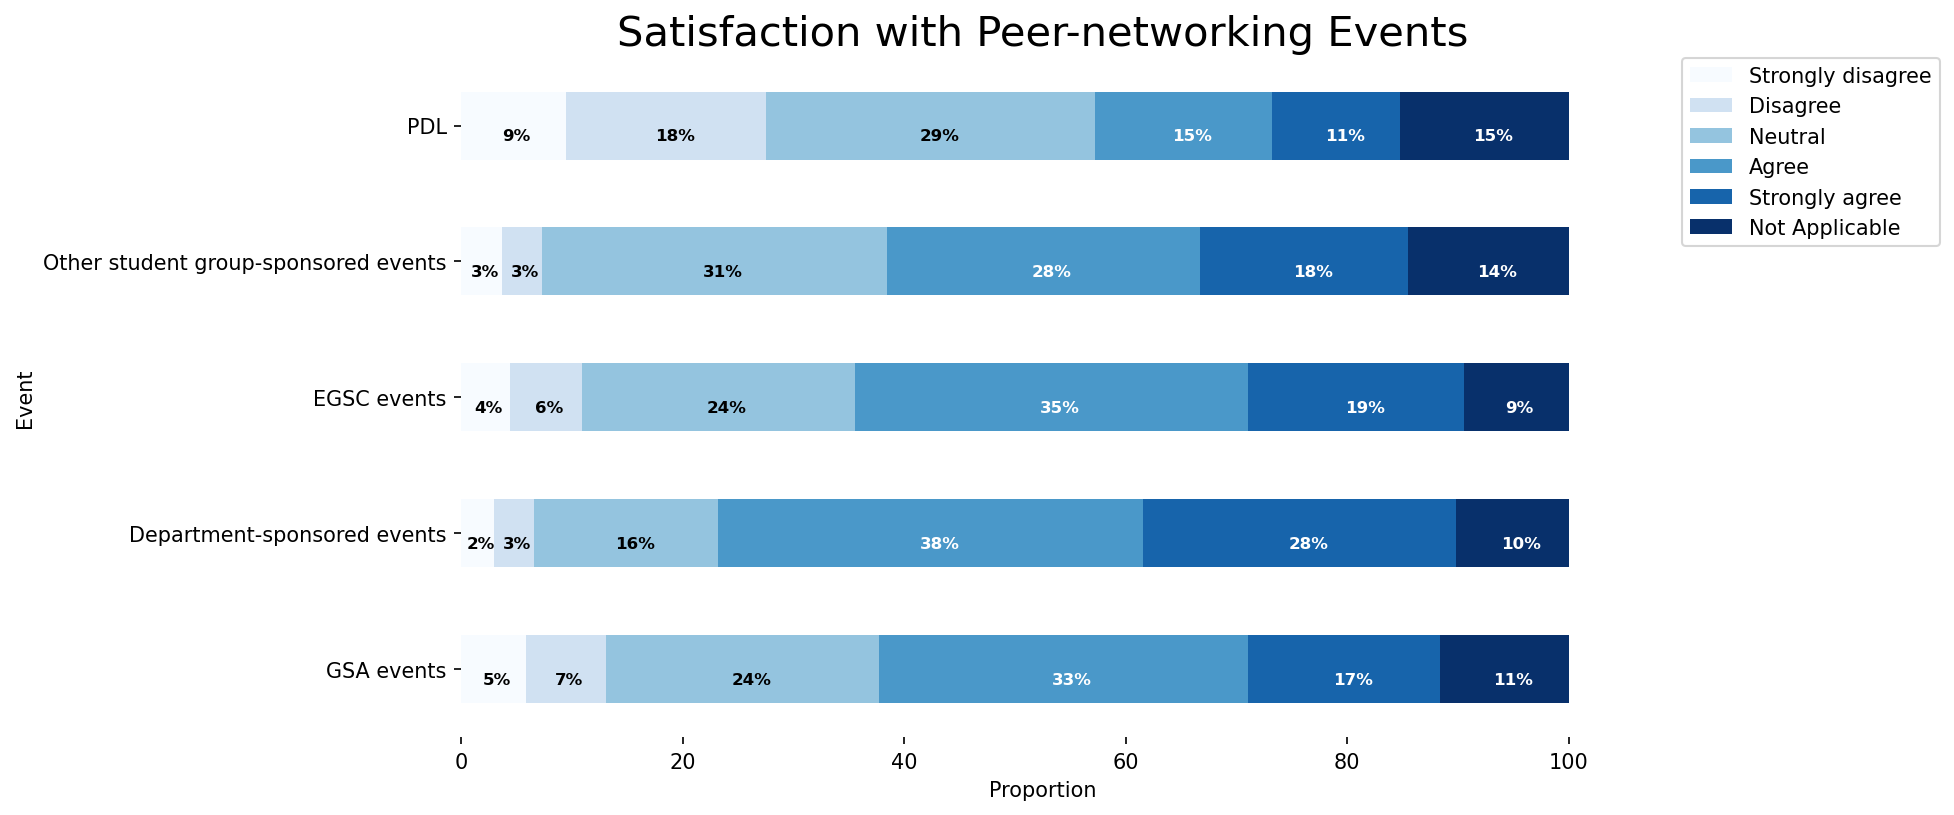

In [150]:
stack_func(stack_peernetwork_events, "Proportion", "Event", "Satisfaction with Peer-networking Events", agree_index_6)

### Acclimation as a Result of Orientation

In [151]:
orientation = df[['University resources', 
                  'Columbia campus',
                  'New York City', 
                  'My department', 
                  'Student groups',
                  'EGSC/Office of Graduate Student Affairs']]
orientation['University resources'].value_counts()

Agree                         59
Neither agree nor disagree    39
Strongly agree                17
Disagree                      17
Strongly disagree              6
Name: University resources, dtype: int64

In [152]:
orientation['University resources'].value_counts()

Agree                         59
Neither agree nor disagree    39
Strongly agree                17
Disagree                      17
Strongly disagree              6
Name: University resources, dtype: int64

In [153]:
orientation_t = pd.concat([count_proportion(df['University resources']), 
                           count_proportion(df['Columbia campus']), 
                           count_proportion(df['New York City']), 
                           count_proportion(df['My department']), 
                           count_proportion(df['Student groups']), 
                           count_proportion(df['EGSC/Office of Graduate Student Affairs'])], axis=1)

c_orientation_t = ['University resources', 
                          'Columbia campus',
                          'New York City', 
                          'My department', 
                          'Student groups',
                          'EGSC/Office of Graduate Student Affairs']

orientation_t.columns = c_orientation_t

orientation_t

,University resources,Columbia campus,New York City,My department,Student groups,EGSC/Office of Graduate Student Affairs
Strongly disagree,4.347826,5.072464,10.144928,2.898551,5.072464,3.623188
Disagree,12.318841,15.217391,20.289855,7.246377,18.840580,12.318841
Neutral,28.260870,21.014493,34.782609,19.565217,27.536232,31.159420
Agree,42.753623,47.826087,26.811594,50.724638,39.130435,40.579710
Strongly agree,12.318841,10.869565,7.971014,19.565217,9.420290,12.318841


                   University resources  Columbia campus  New York City  \
Strongly disagree              5.507474         5.350118       8.575924   
Disagree                       8.890637         9.520063      16.050354   
Neutral                       22.659323        19.354839      30.055075   
Agree                         49.488592        49.488592      34.146341   
Strongly agree                13.453973        16.286389      11.172305   

                   My department  Student groups  \
Strongly disagree       5.035405        6.294256   
Disagree                7.946499       14.162077   
Neutral                19.197482       29.189614   
Agree                  53.107789       39.575138   
Strongly agree         14.712825       10.778914   

                   EGSC/Office of Graduate Student Affairs  
Strongly disagree                                 5.664831  
Disagree                                          8.733281  
Neutral                                          28.0

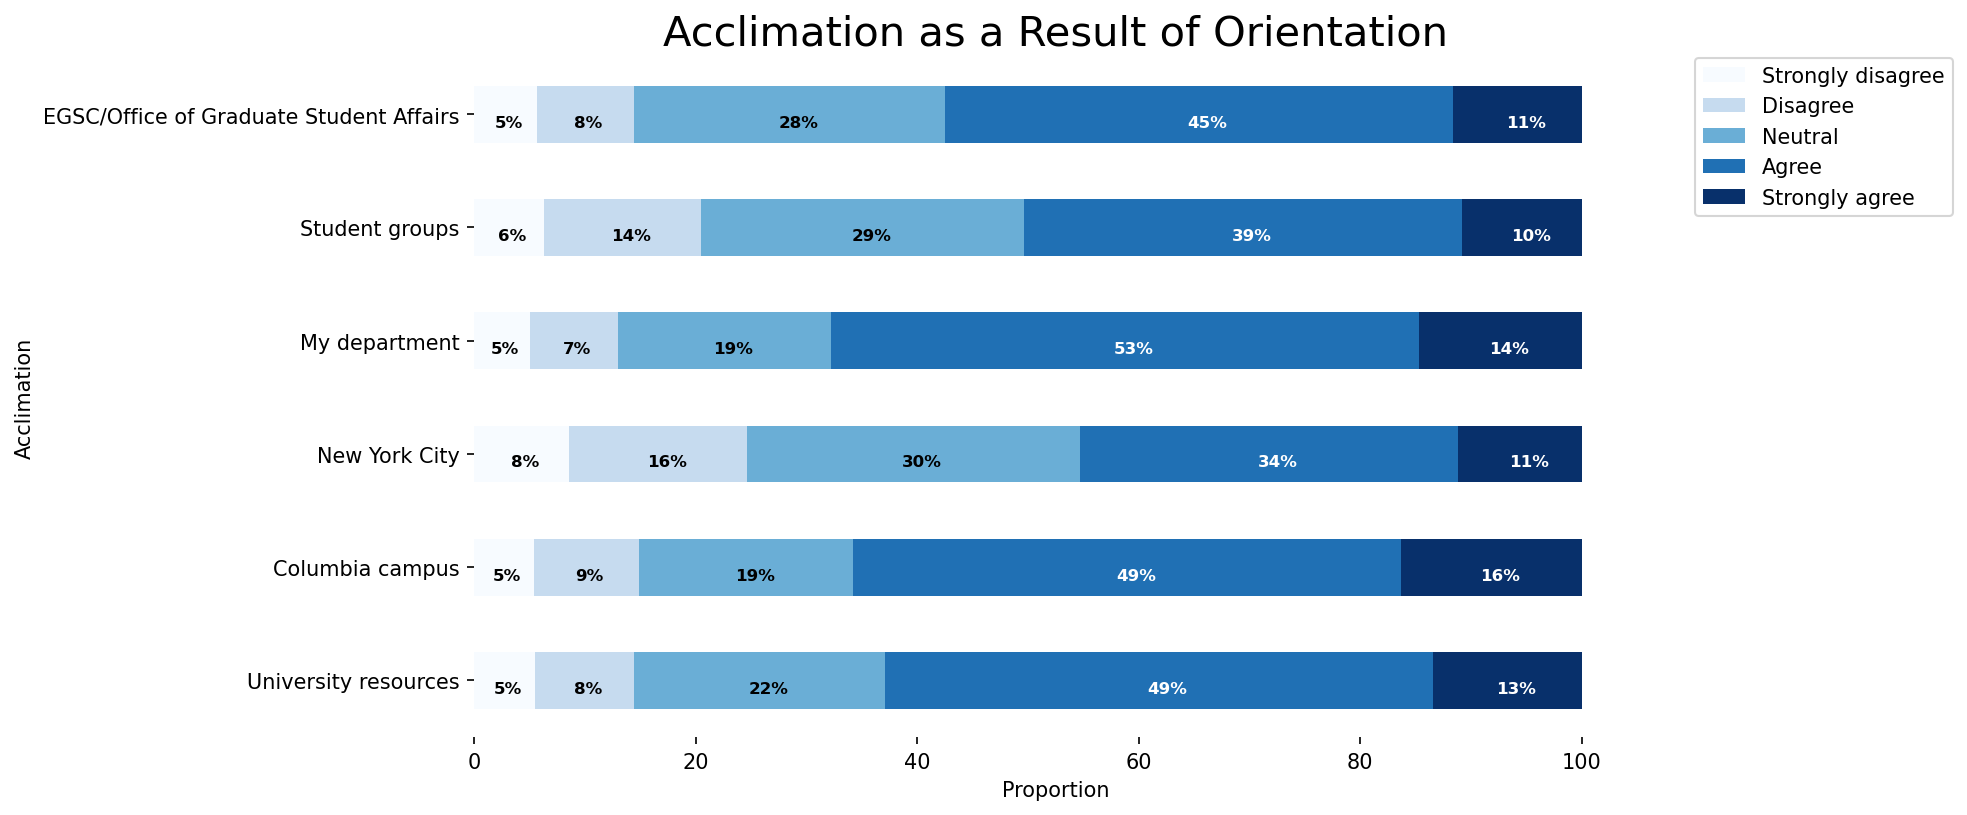

In [153]:
stack_func(orientation_t, "Proportion", "Acclimation", "Acclimation as a Result of Orientation", agree_index)